In [2]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import quandl
quandl.ApiConfig.api_key = 'wN9AzxGMrcsR4SgECQiL'
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (16.0, 6.0)

pd.options.display.float_format = '{:,.2f}'.format
pd.options.display.max_rows = 15

In [43]:
#function to grab data from Quandl and convert to dataframe 

def get_historical(ticker):
    data = quandl.get_table('WIKI/PRICES',
                            qopts={'columns': ['date', 'adj_close']},
                            ticker = ticker)
    data.index = data['date']
    #data = data.iloc[:, 1]
    data = pd.DataFrame(data)
    
    if data.iloc[:, 1].values.sum() == 0: #empty
        print 'Error: No Quandl data for %s stock' %ticker
        return 0
    else: 
        return data

In [45]:
'''
data = quandl.get_table('WIKI/PRICES',
                        qopts={'columns': ['date', 'adj_close']},
                        ticker = 'yelp')
data.index = data['date']
#data = data.iloc[:, 1] #drop date 
data = pd.DataFrame(data)
data.head(5)
''';

In [5]:
#S&P 500 - scraped from wikipedia -- Separate .py file 
# , 'abbv', 'bf' #stocks w annoying tickers...
sp500 = ['Date', 'mmm', 'abt', 'acn', 'atvi', 'ayi', 'adbe', 'amd', 'aap', 'aes', 'aet', 'amg', 'afl',
         'a', 'apd', 'akam', 'alk', 'alb', 'are', 'agn', 'lnt', 'alxn', 'alle', 'ads', 'all', 'googl',
         'goog', 'mo', 'amzn', 'aee', 'aal', 'aep', 'axp', 'aig', 'amt', 'awk', 'amp', 'abc', 'ame',
         'amgn', 'aph', 'apc', 'adi', 'antm', 'aon', 'apa', 'aiv', 'aapl', 'amat', 'adm', 'arnc', 'ajg',
         'aiz', 't', 'adsk', 'adp', 'an', 'azo', 'avb', 'avy', 'bhi', 'bll', 'bac', 'bk', 'bcr', 'bax',
         'bbt', 'bdx', 'bbby', 'brk', 'bby', 'biib', 'blk', 'hrb', 'ba', 'bwa', 'bxp', 'bsx', 'bmy', 
         'avgo', 'chrw', 'ca', 'cog', 'cpb', 'cof', 'cah', 'cboe', 'kmx', 'ccl', 'cat', 'cbg', 'cbs',
         'celg', 'cnc', 'cnp', 'ctl', 'cern', 'cf', 'schw', 'chtr', 'chk', 'cvx', 'cmg', 'cb', 'chd', 'ci', 
         'xec', 'cinf', 'ctas', 'csco', 'c', 'cfg', 'ctxs', 'clx', 'cme', 'cms', 'coh', 'ko', 'ctsh', 'cl', 
         'cmcsa', 'cma', 'cag', 'cxo', 'cop', 'ed', 'stz', 'glw', 'cost', 'coty', 'cci', 'csra', 'csx', 'cmi',
         'cvs', 'dhi', 'dhr', 'dri', 'dva', 'de', 'dlph', 'dal', 'xray', 'dvn', 'dlr', 'dfs', 'disca', 'disck',
         'dish', 'dg', 'dltr', 'd', 'dov', 'dow', 'dps', 'dte', 'dd', 'duk', 'dnb', 'etfc', 'emn', 'etn', 'ebay',
         'ecl', 'eix', 'ew', 'ea', 'emr', 'etr', 'evhc', 'eog', 'eqt', 'efx', 'eqix', 'eqr', 'ess', 'el', 'es',
         'exc', 'expe', 'expd', 'esrx', 'exr', 'xom', 'ffiv', 'fb', 'fast', 'frt', 'fdx', 'fis', 'fitb', 'fe', 
         'fisv', 'flir', 'fls', 'flr', 'fmc', 'fti', 'fl', 'f', 'ftv', 'fbhs', 'ben', 'fcx', 'gps', 'grmn', 'gd',
         'ge', 'ggp', 'gis', 'gm', 'gpc', 'gild', 'gpn', 'gs', 'gt', 'gww', 'hal', 'hbi', 'hog', 'hrs', 'hig', 'has',
         'hca', 'hcp', 'hp', 'hsic', 'hes', 'hpe', 'holx', 'hd', 'hon', 'hrl', 'hst', 'hpq', 'hum', 'hban', 'idxx',
         'itw', 'ilmn', 'ir', 'intc', 'ice', 'ibm', 'incy', 'ip', 'ipg', 'iff', 'intu', 'isrg', 'ivz', 'irm', 'jec',
         'jbht', 'sjm', 'jnj', 'jci', 'jpm', 'jnpr', 'ksu', 'k', 'key', 'kmb', 'kim', 'kmi', 'klac', 'kss', 'khc', 
         'kr', 'lb', 'lll', 'lh', 'lrcx', 'leg', 'len', 'lvlt', 'luk', 'lly', 'lnc', 'lkq', 'lmt', 'l', 'low', 'lyb',
         'mtb', 'mac', 'm', 'mnk', 'mro', 'mpc', 'mar', 'mmc', 'mlm', 'mas', 'ma', 'mat', 'mkc', 'mcd', 'mck', 
         'mjn', 'mdt', 'mrk', 'met', 'mtd', 'kors', 'mchp', 'mu', 'msft', 'maa', 'mhk', 'tap', 'mdlz', 'mon', 
         'mnst', 'mco', 'ms', 'mos', 'msi', 'mur', 'myl', 'ndaq', 'nov', 'navi', 'ntap', 'nflx', 'nwl', 'nfx', 
         'nem', 'nwsa', 'nws', 'nee', 'nlsn', 'nke', 'ni', 'nbl', 'jwn', 'nsc', 'ntrs', 'noc', 'nrg', 'nue', 
         'nvda', 'orly', 'oxy', 'omc', 'oke', 'orcl', 'pcar', 'ph', 'pdco', 'payx', 'pypl', 'pnr', 'pbct', 'pep', 
         'pki', 'prgo', 'pfe', 'pcg', 'pm', 'psx', 'pnw', 'pxd', 'pnc', 'rl', 'ppg', 'ppl', 'px', 'pcln', 'pfg', 
         'pg', 'pgr', 'pld', 'pru', 'peg', 'psa', 'phm', 'pvh', 'qrvo', 'pwr', 'qcom', 'dgx', 'rrc', 'rjf', 'rtn',
         'o', 'rht', 'reg', 'regn', 'rf', 'rsg', 'rai', 'rhi', 'rok', 'col', 'rop', 'rost', 'rcl', 'r', 'crm', 
         'scg', 'slb', 'sni', 'stx', 'see', 'sre', 'shw', 'sig', 'spg', 'swks', 'slg', 'sna', 'so', 'luv', 'swn', 
         'spgi', 'swk', 'spls', 'sbux', 'stt', 'srcl', 'syk', 'sti', 'symc', 'syf', 'snps', 'syy', 'trow', 'tgt',
         'tel', 'tgna', 'tdc', 'tso', 'txn', 'txt', 'coo', 'hsy', 'trv', 'tmo', 'tif', 'twx', 'tjx', 'tmk', 'tss',
         'tsco', 'tdg', 'rig', 'trip', 'foxa', 'fox', 'tsn', 'udr', 'ulta', 'usb', 'ua', 'uaa', 'unp', 'ual', 'unh',
         'ups', 'uri', 'utx', 'uhs', 'unm', 'vfc', 'vlo', 'var', 'vtr', 'vrsn', 'vrsk', 'vz', 'vrtx', 'viab', 
         'v', 'vno', 'vmc', 'wmt', 'wba', 'dis', 'wm', 'wat', 'wec', 'wfc', 'hcn', 'wdc', 'wu', 'wrk', 'wy', 'whr',
         'wfm', 'wmb', 'wltw', 'wyn', 'wynn', 'xel', 'xrx', 'xlnx', 'xl', 'xyl', 'yhoo', 'yum', 'zbh', 'zion', 'zts']

#sp400
sp400 = ['aos', 'aan', 'abmd', 'acc', 'achc', 'aciw', 'acm', 'acxm', 'aeo', 'afg', 'agco', 'ahl', 'akrx', 'alex',
         'algn', 'y', 'ati', 'amcx', 'anss', 'wtr', 'arw', 'arrs', 'asb', 'ash', 'ato', 'atr', 'car', 'avt', 'avp',
         'bc', 'bdc', 'bid', 'big', 'bio', 'bivv', 'bkh', 'bms', 'boh', 'br', 'brcd', 'bro', 'bwld', 'bxs', 'caa',
         'cab', 'cabo', 'cake', 'casy', 'caty', 'cbsh', 'cbt', 'cc', 'ccp', 'cdk', 'cdns', 'cfr', 'cgnx', 'chdn',
         'chfc', 'chs', 'cien', 'clgx', 'clh', 'cli', 'cmc', 'cmp', 'cnk', 'cno', 'cohr', 'cone', 'cprt', 'cpt', 'cr',
         'cree', 'cri', 'crl', 'crs', 'crus', 'cnx', 'csl', 'cst', 'ctb', 'ctlt', 'cuz', 'cvg', 'cvlt', 'cxw', 'cw',
         'cbrl', 'cy', 'dan', 'dbd', 'dci', 'dct', 'ddd', 'dds', 'deck', 'dei', 'df', 'dks', 'dlx', 'dnb', 'dnkn',
         'dnow', 'do', 'dpz', 'dre', 'drq', 'dst', 'dv', 'dy', 'eat', 'edr', 'egn', 'eme', 'endp', 'enr', 'ens', 'epc',
         'epr', 'esl', 'esv', 'ev', 'ewbc', 'exp', 'faf', 'fcn', 'fds', 'fhn', 'fico', 'fii', 'flo', 'fr', 'fnb',
         'fslr', 'ftnt', 'ftr', 'fult', 'gatx', 'gef', 'geo', 'ggg', 'ghc', 'gme', 'gmed', 'gntx', 'gnw', 'gpor',
         'gva', 'gwr', 'gxp', 'hain', 'hbhc', 'he', 'hele', 'hfc', 'hii', 'hiw', 'hls', 'hni', 'hpt', 'hr', 'hrc',
         'hsni', 'hubb', 'hyh', 'iboc', 'ida', 'idcc', 'idti', 'iex', 'incr', 'ingr', 'int', 'ipgp', 'isca', 'itt',
         'jack', 'jbl', 'jblu', 'jcom', 'jcp', 'jkhy', 'jll', 'jns', 'jw.a', 'kate', 'kbh', 'kbr', 'kex', 'keys',
         'klxi', 'kmpr', 'kmt', 'kn', 'krc', 'lamr', 'lanc', 'ldos', 'leco', 'lfus', 'lho', 'lii', 'livn', 'lm', 
         'lnce', 'logm', 'lpnt', 'lpt', 'lpx', 'lsi', 'lstr', 'lw', 'lyv', 'man', 'manh', 'masi', 'mbfi', 'mcy',
         'md', 'mdp', 'mdrx', 'mdu', 'mik', 'mktx', 'mlhr', 'mms', 'moh', 'mpw', 'mpwr', 'msa', 'mscc', 'msci',
         'msm', 'mtx', 'musa', 'nati', 'nbr', 'ncr', 'ndsn', 'ne', 'neu', 'nfg', 'njr', 'nnn', 'nsr', 'ntct', 'nus',
         'nuva', 'nvr', 'nwe', 'nycb', 'nyt', 'oa', 'odfl', 'odp', 'ofc', 'oge', 'ogs', 'ohi', 'oii', 'ois', 'oln',
         'oi', 'omi', 'ori', 'osk', 'ozrk', 'pacw', 'pbf', 'pay', 'pb', 'pbh', 'pbi', 'pch', 'pii', 'pkg', 'plt',
         'pnm', 'pnra', 'pol', 'pool', 'post', 'pri', 'prxl', 'ptc', 'pten', 'pvtb', 'pzza', 'qcp', 'qep', 'rbc',
         'rdc', 're', 'rga', 'rgld', 'rmd', 'rnr', 'rol', 'rpm', 'rs', 'ryn', 'sabr', 'saic', 'sam', 'sbh', 'sbny',
         'sci', 'seic', 'sf', 'sfm', 'sivb', 'skt', 'skx', 'slab', 'slgn', 'slm', 'sm', 'smg', 'snh', 'snv', 'snx', 
         'son', 'spn', 'ste', 'stld', 'swn', 'swx', 'sxt', 'syna', 'tcb', 'tcbi', 'tco', 'tds', 'tdy', 'tecd', 'tech',
         'ter', 'tex', 'tfx', 'thc', 'thg', 'tho', 'ths', 'time', 'tkr', 'tol', 'tph', 'tpx', 'tr', 'trmb', 'trmk',
         'trn', 'ttc', 'ttwo', 'tup', 'txrh', 'tyl', 'ubsi', 'ue', 'ufs', 'ugi', 'ulti', 'umbf', 'umpq', 'unfi', 
         'uthr', 'unit', 'urbn', 'vly', 'vmi', 'val', 'woof', 'vvc', 'vsm', 'vsat', 'vsh', 'wrb', 'wab', 'wafd', 
         'wbmd', 'wbs', 'wcg', 'wen', 'wern', 'wex', 'wgl', 'wnr', 'wor', 'wpg', 'wpx', 'wr', 'wri', 'wsm', 'wso',
         'wst', 'wtfc', 'wwd', 'x', 'zbra']

In [46]:
# scrape the data 

crawl = False #to prevent overwriting data 
if crawl == True: 
    
    #stocks of interest not in sp500
    #names = ['fb', 'inod']
    names = ['tsla', 'lulu', 'onvo', 'yelp', 'twtr', 'z', 'aapl']
    
    names = names+sp500+sp400
    names = list(set(names)) #delete duplicates
    
    print 'initializing...'
    delete_col = 'aapl' #setup df 'Date', pick stock with long history 
    df = get_historical(delete_col)
    df = df.rename(columns={'adj_close': 'delete_me'})

    for i, name in enumerate(names):
        print "collecting data: ", name 
        share_df = get_historical(name) #pull stock from api 
        if isinstance(share_df, int): #test if API returned data 
            continue 
        share_df = share_df.rename(columns={'adj_close': names[i]})
        df = pd.merge(df, share_df, on='date', how='left')
        
    df = df.drop(['delete_me'], axis=1)
    df.index = df['date']

    df.to_csv('quandl.csv') #for safe keeping :) 
    print df.tail(2) #spot check 
    print df.head(2)
    
else: 
    print 'crawling is off'


crawling is off


In [47]:
#take a peek at the data 
df = pd.read_csv('quandl.csv')
df.index = df['date']
df = df.iloc[:, 2:] #drop date columns 
df.head(10)

,ulti,all,gt,gs,alk,nws,fox,scg,alb,lly,...,eog,yelp,hni,cpb,cmp,dva,masi,time,cpt,bcr
date,,,,,,,,,,,,,,,,,,,,,
1980-12-12,nan,nan,4.85,nan,nan,nan,nan,nan,nan,1.42,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1980-12-15,nan,nan,4.89,nan,nan,nan,nan,nan,nan,1.43,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1980-12-16,nan,nan,4.81,nan,nan,nan,nan,nan,nan,1.44,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1980-12-17,nan,nan,4.74,nan,nan,nan,nan,nan,nan,1.49,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1980-12-18,nan,nan,4.81,nan,nan,nan,nan,nan,nan,1.50,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1980-12-19,nan,nan,4.85,nan,nan,nan,nan,nan,nan,1.51,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1980-12-22,nan,nan,4.89,nan,nan,nan,nan,nan,nan,1.53,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1980-12-23,nan,nan,4.93,nan,nan,nan,nan,nan,nan,1.57,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1980-12-24,nan,nan,4.89,nan,nan,nan,nan,nan,nan,1.56,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


# Standardized returns streams 

In [66]:
df_window = df.iloc[-1000:] #number of days to lookback
df_window = df_window.dropna(axis=1)
std_scale = preprocessing.StandardScaler() #scale the data, standardized 
df_std = std_scale.fit_transform(df_window)
df_std = pd.DataFrame(data=df_std, columns=df_window.columns) #back to dataframe 
df_std

,ulti,all,gs,alk,nws,fox,scg,alb,edr,nwe,...,dvn,eog,yelp,hni,cpb,cmp,dva,masi,cpt,bcr
0,-1.49,-1.53,-0.89,-1.74,-0.04,-0.39,-1.00,-0.38,-1.00,-1.76,...,0.22,-1.67,-0.38,-0.69,-0.79,0.73,-1.38,-0.94,-0.78,-1.57
1,-1.55,-1.55,-0.98,-1.76,0.30,-0.33,-1.01,-0.37,-0.98,-1.76,...,0.23,-1.62,-0.36,-0.78,-0.80,0.72,-1.54,-0.93,-0.77,-1.57
2,-1.61,-1.55,-0.94,-1.72,0.66,-0.33,-1.02,-0.37,-0.97,-1.71,...,0.23,-1.57,-0.31,-0.81,-0.81,0.69,-1.51,-0.91,-0.75,-1.56
3,-1.55,-1.45,-0.85,-1.72,0.42,-0.07,-0.96,-0.48,-0.96,-1.66,...,0.27,-1.51,-0.32,-0.84,-0.77,0.73,-1.58,-0.92,-0.72,-1.54
4,-1.55,-1.45,-0.84,-1.73,0.72,-0.17,-0.95,-0.47,-0.97,-1.64,...,0.35,-1.44,-0.20,-0.87,-0.68,0.74,-1.54,-0.91,-0.75,-1.52
5,-1.56,-1.42,-0.78,-1.71,0.59,-0.13,-0.95,-0.49,-0.95,-1.64,...,0.30,-1.40,-0.26,-0.88,-0.67,0.76,-1.49,-0.90,-0.72,-1.53
6,-1.54,-1.45,-0.78,-1.72,0.56,-0.14,-0.93,-0.47,-0.91,-1.65,...,0.31,-1.44,-0.31,-0.85,-0.67,0.92,-1.50,-0.91,-0.71,-1.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,1.74,2.58,1.51,1.54,-0.27,-1.26,1.38,2.22,1.12,1.91,...,-1.48,-0.04,-0.83,-0.42,0.64,-1.47,-0.69,2.47,1.88,2.83
994,1.81,2.56,1.42,1.58,-0.21,-1.15,1.36,2.20,1.12,1.90,...,-1.44,-0.03,-0.78,-0.37,0.59,-1.49,-0.71,2.50,1.91,2.83


Check how well the scaled data follows the true data. 

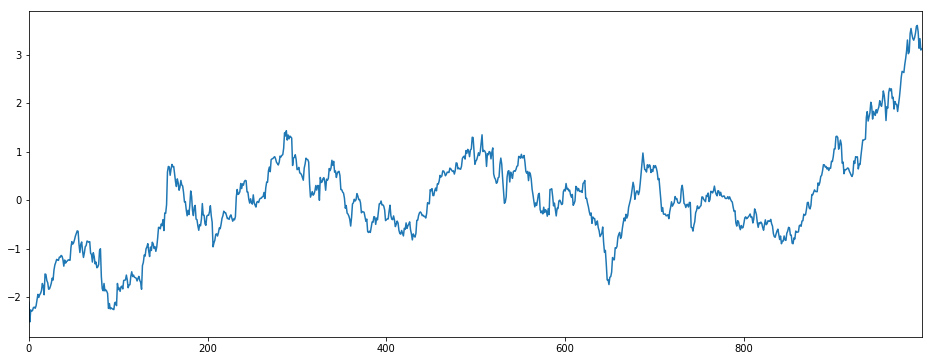

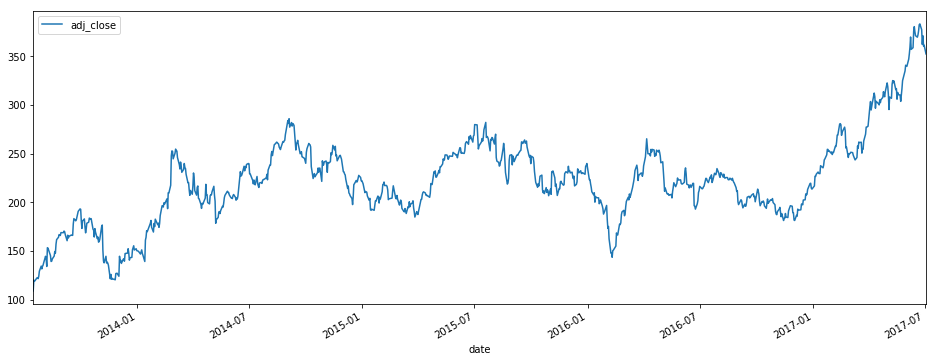

In [69]:
df_std.tsla.plot();
plt.show()

data_test = get_historical('tsla')
data_test.iloc[-1000:].plot();
plt.show()

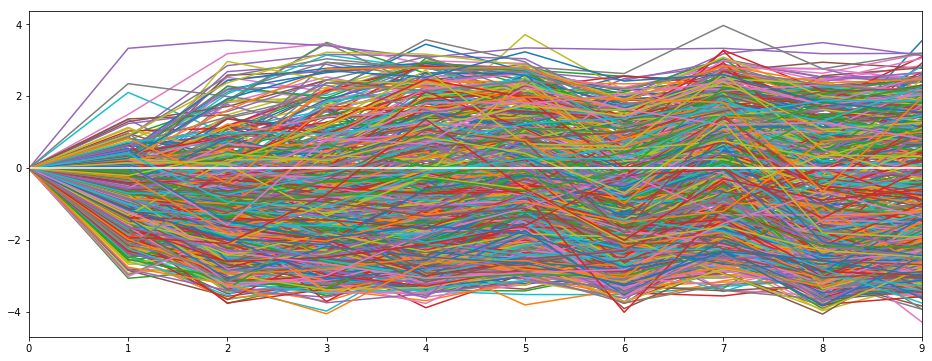

In [70]:
'''
use this function to create uniformly scaled data, then initialzied each start value to 0 and plot. 
the result are return streams in the form of unit variance. 
'''
lookback = 10

df_window = df.iloc[-lookback:] #last n values 
df_window = df_window.dropna(axis=1)
std_scale = preprocessing.StandardScaler() #scale the data [u=0,sigma=1]
df_scaled = std_scale.fit_transform(df_window)
df_scaled = pd.DataFrame(data=df_scaled, columns=df_window.columns)
#print df_scaled

for col in df_scaled: 
    #print col, df_scaled[col][0]
    start = df_scaled[col][0] #last value 
    df_scaled[col] = df_scaled[col].apply(lambda x: x-start)
df_scaled.plot(legend=False);

x= np.linspace(0, lookback-1, lookback) #line going through 0 
y = np.zeros((lookback, 1))
plt.plot(x, y, c='white')
plt.show()

#df_scaled.head(50)
